<a href="https://colab.research.google.com/github/Kouichi1229/Python_work/blob/main/%20InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/AI_專題/bug.zip" /content/

In [ ]:
!unzip /content/bug.zip -d  /content/

Archive:  /content/bug.zip
   creating: /content/bug/
   creating: /content/bug/Helicoverpa armigera/
  inflating: /content/bug/Helicoverpa armigera/001.jpg  
  inflating: /content/bug/Helicoverpa armigera/002.jpg  
  inflating: /content/bug/Helicoverpa armigera/003.jpg  
  inflating: /content/bug/Helicoverpa armigera/004.jpg  
  inflating: /content/bug/Helicoverpa armigera/005.jpg  
  inflating: /content/bug/Helicoverpa armigera/006.jpg  
  inflating: /content/bug/Helicoverpa armigera/007.jpg  
  inflating: /content/bug/Helicoverpa armigera/008.jpg  
  inflating: /content/bug/Helicoverpa armigera/009.jpg  
  inflating: /content/bug/Helicoverpa armigera/010.jpg  
  inflating: /content/bug/Helicoverpa armigera/011.jpg  
  inflating: /content/bug/Helicoverpa armigera/012.jpg  
  inflating: /content/bug/Helicoverpa armigera/013.jpg  
  inflating: /content/bug/Helicoverpa armigera/014.jpg  
  inflating: /content/bug/Helicoverpa armigera/015.jpg  
  inflating: /content/bug/Helicoverpa armig

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                               include_top=False,
                               weights='imagenet')


# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87916544/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define our example directories and files
base_dir = '/content/bug'

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
#test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size = 4,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     


Found 589 images belonging to 4 classes.


In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
           )

Epoch 1/100
100/100 [==============================] - 11s 110ms/step - loss: 1.7444 - accuracy: 0.3879
Epoch 2/100
100/100 [==============================] - 10s 102ms/step - loss: 1.3331 - accuracy: 0.5063
Epoch 3/100
100/100 [==============================] - 10s 105ms/step - loss: 1.0806 - accuracy: 0.6071
Epoch 4/100
100/100 [==============================] - 11s 110ms/step - loss: 1.0992 - accuracy: 0.5945
Epoch 5/100
100/100 [==============================] - 11s 105ms/step - loss: 1.1168 - accuracy: 0.6425
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 0.9545 - accuracy: 0.6574
Epoch 7/100
100/100 [==============================] - 10s 102ms/step - loss: 0.9361 - accuracy: 0.6751
Epoch 8/100
100/100 [==============================] - 9s 95ms/step - loss: 1.0083 - accuracy: 0.6927
Epoch 9/100
100/100 [==============================] - 10s 101ms/step - loss: 0.8787 - accuracy: 0.6952
Epoch 10/100
100/100 [==============================] - 10s 105ms/

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save('./InceptionV3_bug.h5')

# Model Evaluation
### 1. load pre_trainde model
### 2. train_data , labels input 

In [ ]:
!cp '/content/drive/MyDrive/AI專題共用資料夾/權重/InceptionV3_bug.h5' /content/

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("./InceptionV3_bug.h5")


# 預測圖


In [ ]:
labels_index = [None]*len(train_generator.class_indices)

for item, indice in train_generator.class_indices.items():
    labels_index[indice] = item


In [ ]:
labels_index

['Helicoverpa armigera',
 'Spodoptera exigua',
 'Spodoptera frugiperda',
 'Spodoptera litura']

In [ ]:

def get_pediction(model, data_dir, size, image_size):
    predprobs=[]
    predictions =[]
    true_y = []
    for x,y in tqdm(train_datagen.flow_from_directory(data_dir, batch_size=1, target_size=image_size, shuffle=False)):
        predprob = model.predict(x)
        # decoding one-hot
        prediction = np.argmax(predprob, axis=1)
        y = np.argmax(y, axis =1)
        
        predprobs.append(predprob)
        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        
        if len(predictions) >=size:
            break
    
    predprobs=np.array(predprobs).reshape(len(predictions),len(labels_index)) #(589,4)
    return predprobs,predictions, true_y

In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import itertools
import numpy as np
from tqdm import tqdm 


def get_conf_matrix(model, data_dir, size, image_size):
    predictions =[]
    true_y = []
    for x,y in tqdm(train_datagen.flow_from_directory(data_dir, batch_size=1, target_size=image_size, shuffle=False)):
        predprob = model.predict(x)
        # decoding one-hot
        prediction = np.argmax(predprob, axis=1)
        y = np.argmax(y, axis =1)
        
        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        print(len(predictions))
        if len(predictions) >=size:
            break
    matrix = confusion_matrix(true_y, predictions)

    return matrix

In [ ]:
conf_matrix_inc = get_conf_matrix(model, base_dir, train_generator.samples, (150,150))
pred_prob,predictions, true_y= get_pediction(model, base_dir, train_generator.samples, (150,150))
matrix = confusion_matrix(true_y, predictions)
print(conf_matrix_inc[:,:])




  0%|          | 0/589 [00:00<?, ?it/s]

Found 589 images belonging to 4 classes.
1





  0%|          | 2/589 [00:00<00:31, 18.64it/s]


  1%|          | 4/589 [00:00<00:31, 18.57it/s]

2
3
4
5





  1%|          | 6/589 [00:00<00:31, 18.51it/s]


  1%|▏         | 8/589 [00:00<00:31, 18.67it/s]

6
7
8
9





  2%|▏         | 10/589 [00:00<00:30, 19.05it/s]


  2%|▏         | 12/589 [00:00<00:30, 19.06it/s]

10
11
12
13





  3%|▎         | 15/589 [00:00<00:30, 18.78it/s]


  3%|▎         | 17/589 [00:00<00:32, 17.47it/s]

14
15
16
17





  3%|▎         | 19/589 [00:01<00:34, 16.72it/s]


  4%|▎         | 21/589 [00:01<00:34, 16.70it/s]

18
19
20
21





  4%|▍         | 23/589 [00:01<00:36, 15.45it/s]

22
23
24





  4%|▍         | 25/589 [00:01<00:38, 14.48it/s]


  5%|▍         | 27/589 [00:01<00:38, 14.48it/s]

25
26
27





  5%|▍         | 29/589 [00:01<00:38, 14.45it/s]

28
29
30





  5%|▌         | 31/589 [00:01<00:39, 14.26it/s]


  6%|▌         | 33/589 [00:02<00:37, 14.71it/s]

31
32
33





  6%|▌         | 35/589 [00:02<00:38, 14.50it/s]


  6%|▋         | 37/589 [00:02<00:37, 14.90it/s]

34
35
36
37





  7%|▋         | 39/589 [00:02<00:35, 15.55it/s]

38
39
40
41





  7%|▋         | 42/589 [00:02<00:32, 16.78it/s]


  8%|▊         | 45/589 [00:02<00:30, 17.81it/s]

42
43
44
45
46





  8%|▊         | 47/589 [00:02<00:29, 18.31it/s]


  8%|▊         | 49/589 [00:02<00:30, 17.95it/s]

47
48
49
50





  9%|▊         | 51/589 [00:03<00:29, 17.96it/s]


  9%|▉         | 53/589 [00:03<00:28, 18.50it/s]

51
52
53
54





  9%|▉         | 55/589 [00:03<00:28, 18.73it/s]


 10%|▉         | 57/589 [00:03<00:30, 17.46it/s]

55
56
57





 10%|█         | 59/589 [00:03<00:32, 16.16it/s]


 10%|█         | 61/589 [00:03<00:31, 16.70it/s]

58
59
60
61





 11%|█         | 63/589 [00:03<00:30, 17.26it/s]


 11%|█         | 65/589 [00:03<00:32, 16.00it/s]

62
63
64
65





 11%|█▏        | 67/589 [00:04<00:34, 15.07it/s]

66
67
68





 12%|█▏        | 69/589 [00:04<00:38, 13.63it/s]


 12%|█▏        | 71/589 [00:04<00:37, 13.97it/s]

69
70
71





 12%|█▏        | 73/589 [00:04<00:35, 14.36it/s]


 13%|█▎        | 75/589 [00:04<00:35, 14.54it/s]

72
73
74
75





 13%|█▎        | 77/589 [00:04<00:35, 14.40it/s]


 13%|█▎        | 79/589 [00:04<00:33, 15.06it/s]

76
77
78
79





 14%|█▍        | 81/589 [00:05<00:38, 13.26it/s]

80
81
82





 14%|█▍        | 83/589 [00:05<00:37, 13.58it/s]


 14%|█▍        | 85/589 [00:05<00:35, 14.30it/s]

83
84
85
86





 15%|█▍        | 87/589 [00:05<00:33, 15.03it/s]


 15%|█▌        | 89/589 [00:05<00:33, 15.13it/s]

87
88
89
90





 15%|█▌        | 91/589 [00:05<00:30, 16.15it/s]


 16%|█▌        | 93/589 [00:05<00:34, 14.35it/s]

91
92
93





 16%|█▌        | 95/589 [00:06<00:39, 12.39it/s]

94
95
96





 16%|█▋        | 97/589 [00:06<00:43, 11.27it/s]

97
98





 17%|█▋        | 99/589 [00:06<01:01,  8.02it/s]


 17%|█▋        | 100/589 [00:06<00:58,  8.33it/s]

99
100
101





 17%|█▋        | 102/589 [00:06<00:51,  9.42it/s]


 18%|█▊        | 104/589 [00:07<00:48,  9.90it/s]

102
103
104





 18%|█▊        | 106/589 [00:07<00:49,  9.77it/s]

105
106





 18%|█▊        | 108/589 [00:07<00:50,  9.56it/s]

107
108





 19%|█▊        | 110/589 [00:07<00:52,  9.09it/s]

109
110
111





 19%|█▉        | 112/589 [00:07<00:44, 10.62it/s]


 19%|█▉        | 114/589 [00:08<00:43, 10.97it/s]

112
113
114





 20%|█▉        | 116/589 [00:08<00:38, 12.42it/s]


 20%|██        | 118/589 [00:08<00:36, 13.01it/s]

115
116
117
118





 20%|██        | 120/589 [00:08<00:33, 14.16it/s]

119
120
121





 21%|██        | 122/589 [00:08<00:38, 12.03it/s]


 21%|██        | 124/589 [00:08<00:38, 12.04it/s]

122
123
124





 21%|██▏       | 126/589 [00:09<00:42, 10.84it/s]

125
126





 22%|██▏       | 128/589 [00:09<00:39, 11.71it/s]


 22%|██▏       | 130/589 [00:09<00:35, 13.09it/s]

127
128
129
130





 22%|██▏       | 132/589 [00:09<00:31, 14.38it/s]


 23%|██▎       | 134/589 [00:09<00:29, 15.48it/s]

131
132
133
134





 23%|██▎       | 136/589 [00:09<00:27, 16.48it/s]

135
136





 23%|██▎       | 138/589 [00:09<00:40, 11.03it/s]

137
138





 24%|██▍       | 140/589 [00:10<00:48,  9.16it/s]

139
140





 24%|██▍       | 142/589 [00:10<00:54,  8.15it/s]

141
142





 24%|██▍       | 144/589 [00:10<00:59,  7.44it/s]

143
144





 25%|██▍       | 145/589 [00:11<01:04,  6.89it/s]


 25%|██▍       | 146/589 [00:11<01:03,  6.94it/s]

145
146
147





 25%|██▌       | 148/589 [00:11<00:51,  8.55it/s]


 25%|██▌       | 150/589 [00:11<00:43, 10.04it/s]

148
149
150
151





 26%|██▌       | 152/589 [00:11<00:37, 11.59it/s]


 26%|██▋       | 155/589 [00:11<00:32, 13.38it/s]

152
153
154
155





 27%|██▋       | 157/589 [00:11<00:34, 12.66it/s]

156
157





 27%|██▋       | 159/589 [00:12<00:49,  8.61it/s]


 27%|██▋       | 161/589 [00:12<00:42, 10.16it/s]

158
159
160
161





 28%|██▊       | 163/589 [00:12<00:39, 10.85it/s]


 28%|██▊       | 165/589 [00:12<00:33, 12.54it/s]

162
163
164
165





 28%|██▊       | 167/589 [00:12<00:30, 13.69it/s]


 29%|██▊       | 169/589 [00:12<00:28, 14.90it/s]

166
167
168
169





 29%|██▉       | 172/589 [00:13<00:25, 16.22it/s]

170
171
172
173





 30%|██▉       | 174/589 [00:13<00:24, 16.60it/s]


 30%|██▉       | 176/589 [00:13<00:23, 17.47it/s]

174
175
176
177
178





 30%|███       | 179/589 [00:13<00:22, 18.29it/s]


 31%|███       | 182/589 [00:13<00:21, 19.13it/s]

179
180
181
182
183





 31%|███       | 184/589 [00:13<00:21, 19.14it/s]


 32%|███▏      | 187/589 [00:13<00:20, 19.77it/s]

184
185
186
187
188





 32%|███▏      | 190/589 [00:13<00:20, 19.93it/s]

189
190
191
192
193




 33%|███▎      | 193/589 [00:14<00:20, 19.71it/s]


 33%|███▎      | 195/589 [00:14<00:21, 18.70it/s]


194
195
196





 33%|███▎      | 197/589 [00:14<00:21, 18.31it/s]


 34%|███▍      | 199/589 [00:14<00:20, 18.70it/s]

197
198
199
200





 34%|███▍      | 201/589 [00:14<00:20, 18.91it/s]


 34%|███▍      | 203/589 [00:14<00:20, 18.74it/s]

201
202
203
204





 35%|███▍      | 205/589 [00:14<00:20, 18.65it/s]


 35%|███▌      | 207/589 [00:14<00:21, 18.15it/s]

205
206
207
208





 35%|███▌      | 209/589 [00:14<00:20, 18.14it/s]


 36%|███▌      | 211/589 [00:15<00:20, 18.25it/s]

209
210
211
212





 36%|███▌      | 213/589 [00:15<00:20, 18.33it/s]


 37%|███▋      | 215/589 [00:15<00:20, 18.17it/s]

213
214
215
216





 37%|███▋      | 217/589 [00:15<00:20, 18.24it/s]


 37%|███▋      | 220/589 [00:15<00:19, 18.49it/s]

217
218
219
220





 38%|███▊      | 223/589 [00:15<00:19, 19.13it/s]


 38%|███▊      | 225/589 [00:15<00:18, 19.22it/s]

221
222
223
224
225





 39%|███▊      | 227/589 [00:15<00:19, 18.98it/s]


 39%|███▉      | 229/589 [00:16<00:19, 18.48it/s]

226
227
228
229





 39%|███▉      | 231/589 [00:16<00:19, 18.75it/s]


 40%|███▉      | 233/589 [00:16<00:19, 17.83it/s]

230
231
232
233





 40%|███▉      | 235/589 [00:16<00:19, 18.00it/s]


 40%|████      | 238/589 [00:16<00:18, 18.86it/s]

234
235
236
237
238





 41%|████      | 241/589 [00:16<00:18, 19.27it/s]


 41%|████▏     | 243/589 [00:16<00:17, 19.44it/s]

239
240
241
242
243





 42%|████▏     | 245/589 [00:16<00:17, 19.43it/s]


 42%|████▏     | 247/589 [00:16<00:17, 19.56it/s]

244
245
246
247





 42%|████▏     | 249/589 [00:17<00:17, 19.62it/s]


 43%|████▎     | 251/589 [00:17<00:17, 19.20it/s]

248
249
250
251





 43%|████▎     | 253/589 [00:17<00:18, 18.57it/s]


 43%|████▎     | 255/589 [00:17<00:17, 18.90it/s]

252
253
254
255





 44%|████▎     | 257/589 [00:17<00:17, 18.96it/s]


 44%|████▍     | 259/589 [00:17<00:17, 19.26it/s]

256
257
258
259





 44%|████▍     | 261/589 [00:17<00:16, 19.44it/s]


 45%|████▍     | 263/589 [00:17<00:16, 19.45it/s]

260
261
262
263





 45%|████▍     | 265/589 [00:17<00:16, 19.49it/s]


 45%|████▌     | 267/589 [00:17<00:16, 19.31it/s]

264
265
266
267





 46%|████▌     | 269/589 [00:18<00:17, 18.06it/s]


 46%|████▌     | 271/589 [00:18<00:18, 17.05it/s]

268
269
270
271





 46%|████▋     | 273/589 [00:18<00:18, 16.70it/s]


 47%|████▋     | 275/589 [00:18<00:18, 16.89it/s]

272
273
274
275





 47%|████▋     | 277/589 [00:18<00:17, 17.65it/s]


 48%|████▊     | 280/589 [00:18<00:16, 18.46it/s]

276
277
278
279
280





 48%|████▊     | 282/589 [00:18<00:16, 18.13it/s]


 48%|████▊     | 284/589 [00:18<00:16, 18.61it/s]

281
282
283
284





 49%|████▊     | 286/589 [00:19<00:16, 18.41it/s]


 49%|████▉     | 289/589 [00:19<00:15, 19.04it/s]

285
286
287
288
289





 49%|████▉     | 291/589 [00:19<00:16, 18.47it/s]


 50%|████▉     | 293/589 [00:19<00:16, 17.91it/s]

290
291
292
293





 50%|█████     | 295/589 [00:19<00:16, 17.79it/s]


 50%|█████     | 297/589 [00:19<00:16, 17.85it/s]

294
295
296
297





 51%|█████     | 299/589 [00:19<00:15, 18.32it/s]


 51%|█████     | 301/589 [00:19<00:16, 17.84it/s]

298
299
300
301





 51%|█████▏    | 303/589 [00:20<00:16, 17.43it/s]


 52%|█████▏    | 305/589 [00:20<00:16, 17.29it/s]

302
303
304
305





 52%|█████▏    | 307/589 [00:20<00:16, 17.08it/s]


 52%|█████▏    | 309/589 [00:20<00:16, 17.34it/s]

306
307
308
309





 53%|█████▎    | 311/589 [00:20<00:16, 16.71it/s]


 53%|█████▎    | 313/589 [00:20<00:16, 16.71it/s]

310
311
312
313





 53%|█████▎    | 315/589 [00:20<00:16, 17.08it/s]


 54%|█████▍    | 317/589 [00:20<00:15, 17.43it/s]

314
315
316
317





 54%|█████▍    | 319/589 [00:20<00:15, 17.15it/s]


 54%|█████▍    | 321/589 [00:21<00:16, 16.53it/s]

318
319
320
321





 55%|█████▍    | 323/589 [00:21<00:16, 16.56it/s]


 55%|█████▌    | 325/589 [00:21<00:15, 16.61it/s]

322
323
324
325





 56%|█████▌    | 328/589 [00:21<00:14, 17.77it/s]

326
327
328
329





 56%|█████▌    | 330/589 [00:21<00:14, 17.62it/s]


 56%|█████▋    | 332/589 [00:21<00:15, 16.17it/s]

330
331
332
333





 57%|█████▋    | 334/589 [00:22<00:24, 10.33it/s]


 57%|█████▋    | 336/589 [00:22<00:21, 11.58it/s]

334
335
336
337





 58%|█████▊    | 339/589 [00:22<00:18, 13.24it/s]


 58%|█████▊    | 341/589 [00:22<00:17, 14.45it/s]

338
339
340
341





 58%|█████▊    | 343/589 [00:22<00:16, 15.17it/s]


 59%|█████▊    | 345/589 [00:22<00:15, 15.96it/s]

342
343
344
345





 59%|█████▉    | 347/589 [00:22<00:15, 15.64it/s]


 59%|█████▉    | 349/589 [00:22<00:15, 15.68it/s]

346
347
348
349





 60%|█████▉    | 351/589 [00:23<00:15, 15.86it/s]


 60%|█████▉    | 353/589 [00:23<00:14, 16.00it/s]

350
351
352
353





 60%|██████    | 355/589 [00:23<00:14, 16.26it/s]


 61%|██████    | 357/589 [00:23<00:14, 16.54it/s]

354
355
356
357





 61%|██████    | 359/589 [00:23<00:13, 17.43it/s]

358
359
360





 61%|██████▏   | 361/589 [00:23<00:14, 15.57it/s]


 62%|██████▏   | 364/589 [00:23<00:13, 16.49it/s]

361
362
363
364
365





 62%|██████▏   | 366/589 [00:24<00:21, 10.37it/s]


 62%|██████▏   | 368/589 [00:24<00:19, 11.17it/s]

366
367
368





 63%|██████▎   | 370/589 [00:24<00:18, 11.58it/s]

369
370
371





 63%|██████▎   | 372/589 [00:24<00:18, 11.82it/s]


 63%|██████▎   | 374/589 [00:24<00:17, 12.56it/s]

372
373
374





 64%|██████▍   | 376/589 [00:25<00:18, 11.69it/s]

375
376
377





 64%|██████▍   | 378/589 [00:25<00:18, 11.67it/s]


 65%|██████▍   | 380/589 [00:25<00:17, 12.15it/s]

378
379
380





 65%|██████▍   | 382/589 [00:25<00:16, 12.29it/s]

381
382
383





 65%|██████▌   | 384/589 [00:25<00:17, 11.87it/s]


 66%|██████▌   | 386/589 [00:25<00:15, 12.80it/s]

384
385
386





 66%|██████▌   | 388/589 [00:25<00:15, 13.33it/s]


 66%|██████▌   | 390/589 [00:26<00:14, 13.89it/s]

387
388
389
390





 67%|██████▋   | 392/589 [00:26<00:13, 14.45it/s]

391
392
393





 67%|██████▋   | 394/589 [00:26<00:14, 13.12it/s]


 67%|██████▋   | 396/589 [00:26<00:14, 13.45it/s]

394
395
396





 68%|██████▊   | 398/589 [00:26<00:15, 12.42it/s]

397
398





 68%|██████▊   | 400/589 [00:26<00:15, 11.95it/s]

399
400
401





 68%|██████▊   | 402/589 [00:27<00:16, 11.33it/s]


 69%|██████▊   | 404/589 [00:27<00:16, 11.35it/s]

402
403
404





 69%|██████▉   | 406/589 [00:27<00:15, 11.99it/s]

405
406
407





 69%|██████▉   | 408/589 [00:27<00:15, 11.70it/s]


 70%|██████▉   | 410/589 [00:27<00:14, 12.35it/s]

408
409
410





 70%|██████▉   | 412/589 [00:27<00:14, 12.32it/s]

411
412
413





 70%|███████   | 414/589 [00:28<00:13, 12.81it/s]

414
415





 71%|███████   | 416/589 [00:28<00:15, 10.99it/s]


 71%|███████   | 418/589 [00:28<00:14, 11.73it/s]

416
417
418





 71%|███████▏  | 420/589 [00:28<00:14, 12.04it/s]

419
420
421





 72%|███████▏  | 422/589 [00:28<00:13, 12.10it/s]


 72%|███████▏  | 424/589 [00:28<00:13, 12.63it/s]

422
423
424





 72%|███████▏  | 426/589 [00:29<00:12, 13.07it/s]

425
426
427





 73%|███████▎  | 428/589 [00:29<00:13, 12.38it/s]


 73%|███████▎  | 430/589 [00:29<00:13, 12.04it/s]

428
429
430





 73%|███████▎  | 432/589 [00:29<00:12, 12.80it/s]

431
432
433





 74%|███████▎  | 434/589 [00:29<00:13, 11.85it/s]


 74%|███████▍  | 436/589 [00:29<00:11, 12.76it/s]

434
435
436





 74%|███████▍  | 438/589 [00:29<00:11, 13.02it/s]

437
438
439





 75%|███████▍  | 440/589 [00:30<00:11, 12.90it/s]


 75%|███████▌  | 442/589 [00:30<00:11, 12.51it/s]

440
441
442





 75%|███████▌  | 444/589 [00:30<00:10, 13.19it/s]

443
444
445





 76%|███████▌  | 446/589 [00:30<00:11, 12.76it/s]

446
447





 76%|███████▌  | 448/589 [00:30<00:12, 11.61it/s]

448
449





 76%|███████▋  | 450/589 [00:31<00:13, 10.06it/s]


 77%|███████▋  | 452/589 [00:31<00:12, 10.83it/s]

450
451
452





 77%|███████▋  | 454/589 [00:31<00:10, 12.37it/s]

453
454
455
456





 78%|███████▊  | 457/589 [00:31<00:10, 12.97it/s]


 78%|███████▊  | 459/589 [00:31<00:10, 12.91it/s]

457
458
459





 78%|███████▊  | 461/589 [00:31<00:09, 13.29it/s]

460
461
462
463





 79%|███████▉  | 464/589 [00:31<00:08, 14.80it/s]


 79%|███████▉  | 466/589 [00:32<00:07, 15.79it/s]

464
465
466
467





 79%|███████▉  | 468/589 [00:32<00:07, 16.15it/s]


 80%|███████▉  | 470/589 [00:32<00:07, 15.08it/s]

468
469
470





 80%|████████  | 472/589 [00:32<00:07, 15.38it/s]


 80%|████████  | 474/589 [00:32<00:07, 16.10it/s]

471
472
473
474





 81%|████████  | 476/589 [00:32<00:06, 16.61it/s]


 81%|████████  | 478/589 [00:32<00:06, 17.17it/s]

475
476
477
478





 81%|████████▏ | 480/589 [00:33<00:07, 14.84it/s]

479
480
481





 82%|████████▏ | 482/589 [00:33<00:07, 14.35it/s]


 82%|████████▏ | 484/589 [00:33<00:07, 13.89it/s]

482
483
484





 83%|████████▎ | 486/589 [00:33<00:06, 14.85it/s]


 83%|████████▎ | 488/589 [00:33<00:06, 16.07it/s]

485
486
487
488





 83%|████████▎ | 490/589 [00:33<00:06, 16.07it/s]


 84%|████████▎ | 492/589 [00:33<00:05, 16.42it/s]

489
490
491
492





 84%|████████▍ | 494/589 [00:33<00:06, 15.50it/s]




493
494
495
496


 84%|████████▍ | 496/589 [00:34<00:05, 15.52it/s]


 85%|████████▍ | 498/589 [00:34<00:05, 15.38it/s]


 85%|████████▍ | 500/589 [00:34<00:05, 15.11it/s]

497
498
499
500





 85%|████████▌ | 502/589 [00:34<00:05, 15.36it/s]


 86%|████████▌ | 504/589 [00:34<00:05, 16.30it/s]

501
502
503
504





 86%|████████▌ | 506/589 [00:34<00:04, 16.66it/s]


 86%|████████▌ | 508/589 [00:34<00:04, 16.40it/s]

505
506
507
508





 87%|████████▋ | 510/589 [00:34<00:04, 16.28it/s]


 87%|████████▋ | 512/589 [00:35<00:04, 16.29it/s]

509
510
511
512





 87%|████████▋ | 514/589 [00:35<00:04, 16.43it/s]


 88%|████████▊ | 516/589 [00:35<00:04, 15.93it/s]

513
514
515
516





 88%|████████▊ | 518/589 [00:35<00:04, 16.94it/s]


 88%|████████▊ | 520/589 [00:35<00:04, 16.14it/s]

517
518
519
520





 89%|████████▊ | 522/589 [00:35<00:04, 16.51it/s]


 89%|████████▉ | 525/589 [00:35<00:03, 17.75it/s]

521
522
523
524
525





 89%|████████▉ | 527/589 [00:35<00:03, 17.75it/s]


 90%|████████▉ | 529/589 [00:35<00:03, 18.17it/s]

526
527
528
529





 90%|█████████ | 531/589 [00:36<00:03, 16.87it/s]

530
531
532





 90%|█████████ | 533/589 [00:36<00:03, 14.93it/s]


 91%|█████████ | 535/589 [00:36<00:03, 15.41it/s]

533
534
535





 91%|█████████ | 537/589 [00:36<00:03, 15.17it/s]


 92%|█████████▏| 539/589 [00:36<00:03, 15.76it/s]

536
537
538
539





 92%|█████████▏| 541/589 [00:36<00:02, 16.59it/s]


 92%|█████████▏| 543/589 [00:36<00:02, 17.09it/s]

540
541
542
543





 93%|█████████▎| 545/589 [00:37<00:02, 16.80it/s]


 93%|█████████▎| 547/589 [00:37<00:02, 17.26it/s]

544
545
546
547





 93%|█████████▎| 549/589 [00:37<00:02, 17.66it/s]


 94%|█████████▎| 551/589 [00:37<00:02, 17.17it/s]

548
549
550
551





 94%|█████████▍| 553/589 [00:37<00:02, 15.03it/s]


 94%|█████████▍| 555/589 [00:37<00:02, 16.17it/s]

552
553
554
555





 95%|█████████▍| 557/589 [00:37<00:01, 16.32it/s]


 95%|█████████▍| 559/589 [00:37<00:01, 16.55it/s]

556
557
558
559





 95%|█████████▌| 561/589 [00:37<00:01, 16.51it/s]

560
561
562





 96%|█████████▌| 563/589 [00:38<00:01, 13.40it/s]


 96%|█████████▌| 565/589 [00:38<00:01, 13.97it/s]

563
564
565
566





 96%|█████████▋| 567/589 [00:38<00:01, 14.01it/s]


 97%|█████████▋| 570/589 [00:38<00:01, 14.91it/s]

567
568
569
570





 97%|█████████▋| 572/589 [00:38<00:01, 14.55it/s]


 97%|█████████▋| 574/589 [00:38<00:01, 14.76it/s]

571
572
573
574





 98%|█████████▊| 576/589 [00:39<00:00, 15.58it/s]


 98%|█████████▊| 578/589 [00:39<00:00, 16.58it/s]

575
576
577
578





 98%|█████████▊| 580/589 [00:39<00:00, 16.02it/s]




579
580
581
582


 99%|█████████▉| 582/589 [00:39<00:00, 15.58it/s]


 99%|█████████▉| 584/589 [00:39<00:00, 15.97it/s]


 99%|█████████▉| 586/589 [00:39<00:00, 15.95it/s]

583
584
585
586





100%|█████████▉| 588/589 [00:39<00:00, 14.94it/s]

587
588
589
Found 589 images belonging to 4 classes.






  0%|          | 0/589 [00:00<?, ?it/s]



  0%|          | 2/589 [00:00<00:29, 19.92it/s]



  1%|          | 4/589 [00:00<00:31, 18.74it/s]



  1%|          | 6/589 [00:00<00:50, 11.55it/s]



  1%|▏         | 8/589 [00:00<00:43, 13.21it/s]



  2%|▏         | 10/589 [00:00<00:39, 14.66it/s]



  2%|▏         | 12/589 [00:00<00:36, 15.89it/s]



  2%|▏         | 14/589 [00:00<00:34, 16.70it/s]



  3%|▎         | 16/589 [00:01<00:36, 15.56it/s]



  3%|▎         | 18/589 [00:01<00:36, 15.72it/s]



  3%|▎         | 20/589 [00:01<00:37, 15.28it/s]



  4%|▎         | 22/589 [00:01<00:37, 15.15it/s]



  4%|▍         | 24/589 [00:01<00:41, 13.62it/s]



  4%|▍         | 26/589 [00:01<00:40, 13.89it/s]



  5%|▍         | 28/589 [00:01<00:40, 13.84it/s]



  5%|▌         | 30/589 [00:02<00:41, 13.56it/s]



  5%|▌         | 32/589 [00:02<00:40, 13.90it/s]



  6%|▌         | 34/589 [00:02<00:41, 13.52it/s]



  6%|▌         | 36/589 [00:02<00:40, 13.76it/s]



  6%|▋         | 38/5

[[153   0   5   5]
 [  1  93   4   6]
 [  0   3 214   4]
 [  0   0   1 100]]


Normalized confusion matrix
[[0.93865031 0.         0.03067485 0.03067485]
 [0.00961538 0.89423077 0.03846154 0.05769231]
 [0.         0.01357466 0.96832579 0.01809955]
 [0.         0.         0.00990099 0.99009901]]


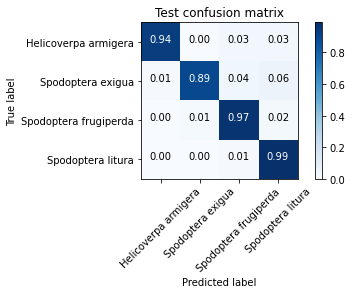

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels_index,normalize=True, title = "Test confusion matrix")



```
prob =[4.3241703e-03 7.8115363e-06 9.9282831e-01 2.8396759e-03]
predictions = np.argmax(prob, axis=1) =>[]

```



### see which images were predicted wrongly

In [ ]:
errors = np.where(predictions != true_y)[0]

In [ ]:
errors

array([ 39,  49,  50,  59,  67,  96, 103, 116, 129, 147, 148, 149, 150,
       166, 167, 193, 201, 206, 210, 235, 239, 246, 249, 253, 293, 301,
       423, 455, 469, 508, 524])

Original label:Helicoverpa armigera/040.jpg, Prediction :Spodoptera frugiperda, confidence : 0.999


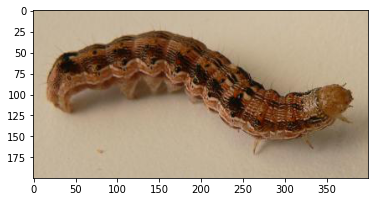

Original label:Helicoverpa armigera/050.jpg, Prediction :Spodoptera litura, confidence : 0.942


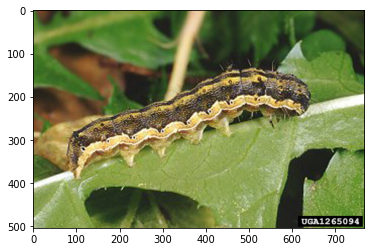

Original label:Helicoverpa armigera/051.jpg, Prediction :Spodoptera litura, confidence : 0.779


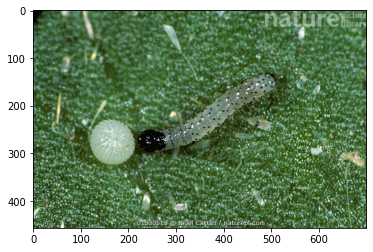

Original label:Helicoverpa armigera/060.jpg, Prediction :Spodoptera frugiperda, confidence : 0.677


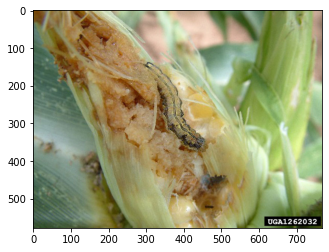

Original label:Helicoverpa armigera/068.jpg, Prediction :Spodoptera litura, confidence : 0.931


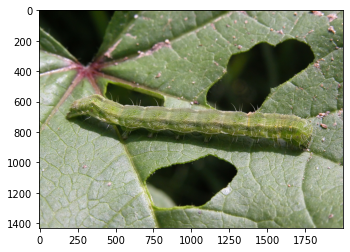

Original label:Helicoverpa armigera/097.jpg, Prediction :Spodoptera frugiperda, confidence : 0.963


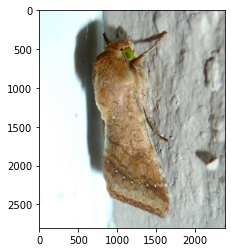

Original label:Helicoverpa armigera/104.jpg, Prediction :Spodoptera frugiperda, confidence : 0.504


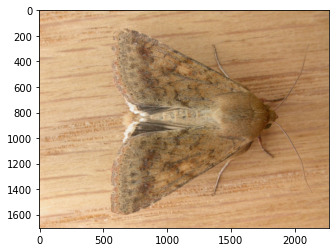

Original label:Helicoverpa armigera/117.jpg, Prediction :Spodoptera litura, confidence : 0.993


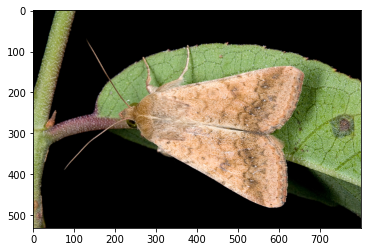

Original label:Helicoverpa armigera/130.jpg, Prediction :Spodoptera frugiperda, confidence : 0.920


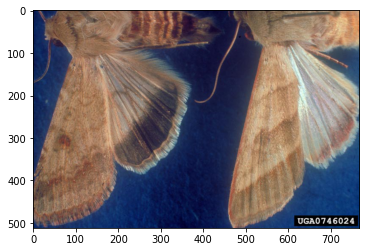

Original label:Helicoverpa armigera/148.jpg, Prediction :Spodoptera frugiperda, confidence : 0.904


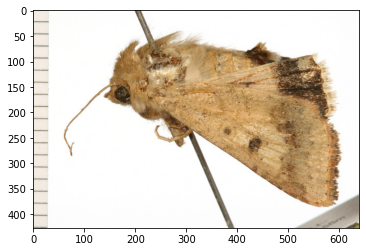

Original label:Helicoverpa armigera/149.jpg, Prediction :Spodoptera frugiperda, confidence : 0.774


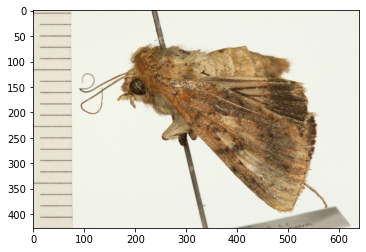

Original label:Helicoverpa armigera/150.jpg, Prediction :Spodoptera frugiperda, confidence : 0.583


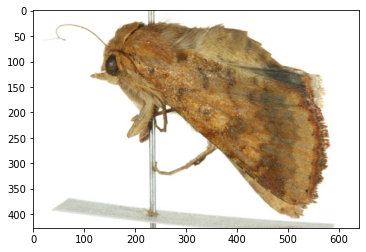

Original label:Helicoverpa armigera/151.jpg, Prediction :Spodoptera frugiperda, confidence : 1.000


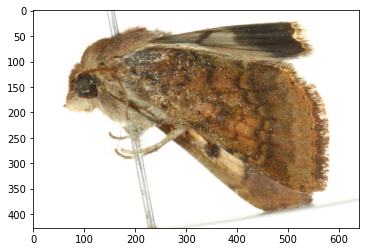

Original label:Spodoptera exigua/004.jpg, Prediction :Spodoptera litura, confidence : 0.901


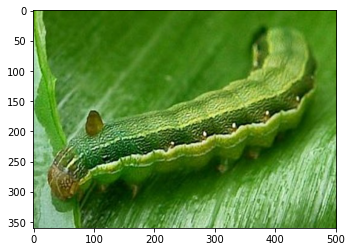

Original label:Spodoptera exigua/005.jpg, Prediction :Spodoptera frugiperda, confidence : 0.992


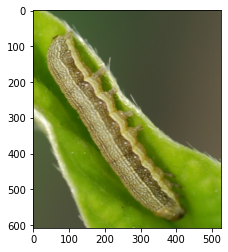

Original label:Spodoptera exigua/031.jpg, Prediction :Spodoptera litura, confidence : 1.000


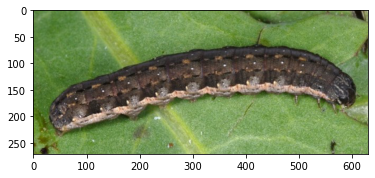

Original label:Spodoptera exigua/039.jpg, Prediction :Helicoverpa armigera, confidence : 0.939


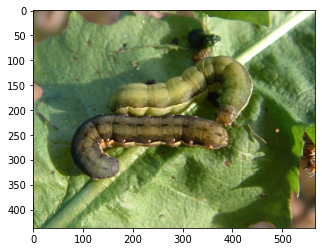

Original label:Spodoptera exigua/044.jpg, Prediction :Spodoptera litura, confidence : 0.989


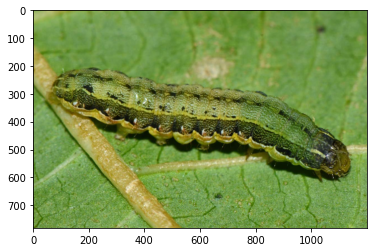

Original label:Spodoptera exigua/048.jpg, Prediction :Spodoptera litura, confidence : 0.991


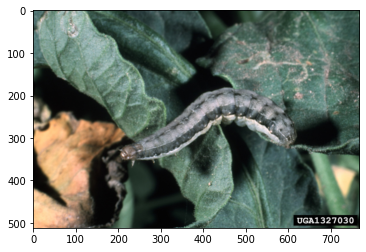

Original label:Spodoptera exigua/073.jpg, Prediction :Spodoptera frugiperda, confidence : 0.927


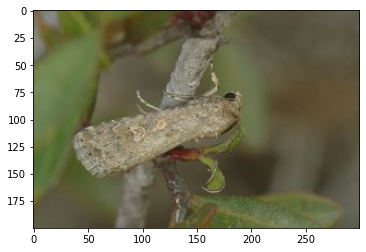

Original label:Spodoptera exigua/077.jpg, Prediction :Spodoptera frugiperda, confidence : 0.965


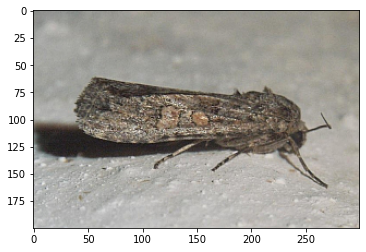

Original label:Spodoptera exigua/084.jpg, Prediction :Spodoptera litura, confidence : 0.572


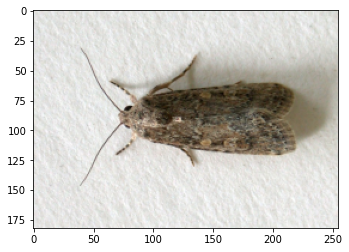

Original label:Spodoptera exigua/087.jpg, Prediction :Spodoptera frugiperda, confidence : 0.685


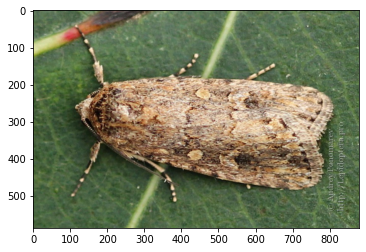

Original label:Spodoptera exigua/091.jpg, Prediction :Spodoptera frugiperda, confidence : 0.958


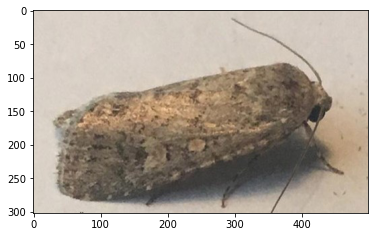

Original label:Spodoptera frugiperda/027.jpg, Prediction :Spodoptera litura, confidence : 0.872


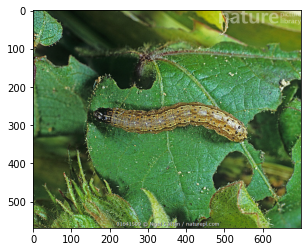

Original label:Spodoptera frugiperda/035.jpg, Prediction :Spodoptera litura, confidence : 0.566


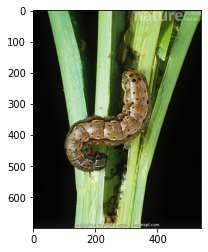

Original label:Spodoptera frugiperda/156.jpg, Prediction :Spodoptera litura, confidence : 0.792


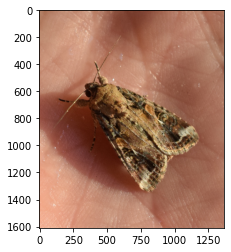

Original label:Spodoptera frugiperda/188.jpg, Prediction :Helicoverpa armigera, confidence : 0.794


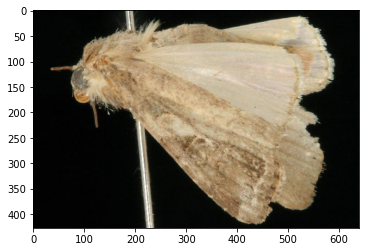

Original label:Spodoptera frugiperda/202.jpg, Prediction :Spodoptera litura, confidence : 0.640


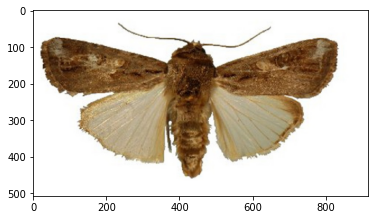

Original label:Spodoptera litura/021.jpg, Prediction :Spodoptera frugiperda, confidence : 0.800


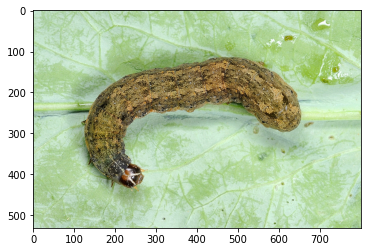

Original label:Spodoptera litura/037.jpg, Prediction :Spodoptera frugiperda, confidence : 0.628


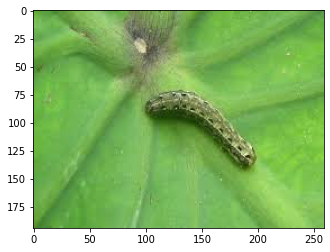

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

fnames=train_generator.filenames
for i in range(len(errors)):
    pred_class = np.argmax(pred_prob[errors[i]])
    pred_label = labels_index[pred_class]
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('\\')[0],
        pred_label,
        pred_prob[errors[i]][pred_class]))
    
    original = load_img('{}/{}'.format(base_dir,fnames[errors[i]]))
    plt.imshow(original)
    plt.show()

# CAM 


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow 

In [ ]:
ORIGINAL = '/content/bug/Spodoptera exigua/001.jpg'

DIM = 150# # file input_shape(299,299,3)

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

#cv2_imshow(cv2.imread(ORIGINAL))

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('mixed7')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

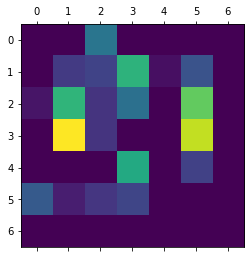

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(ORIGINAL)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

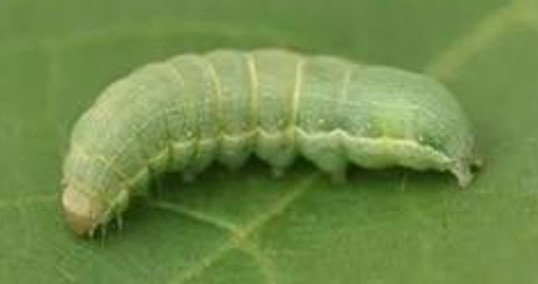

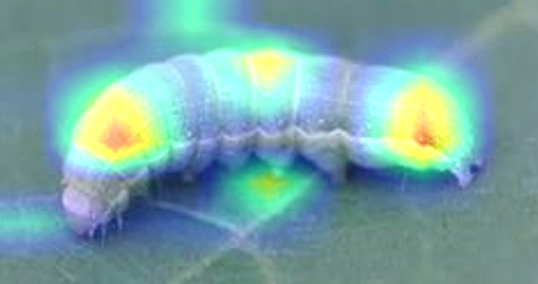

In [ ]:
cv2_imshow(cv2.imread(ORIGINAL))
cv2_imshow(img)

In [ ]:
def gradCAM(orig, intensity=0.5, res=250):
  img = image.load_img(orig, target_size=(C, DIM))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('mixed7')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((8, 8))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))